<a href="https://colab.research.google.com/github/Seminahn01/DS4002-Project-2/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
install.packages('astsa')
library(astsa)
install.packages("forecast")
install.packages("tseries")
library(forecast)
library(tseries)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:astsa’:

    gas




In [2]:
# load data
eggs <- read.csv("/content/egg prices.csv")

In [3]:
# turn dates into numeric values
eggs$observation_date <- as.numeric(gsub("-","",eggs$observation_date))

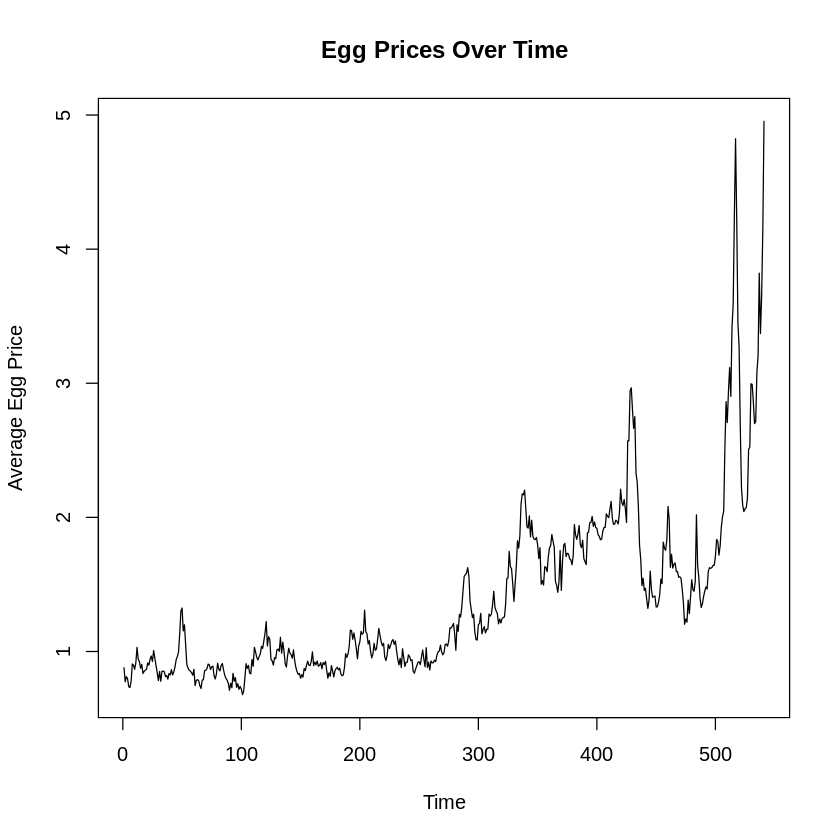

In [15]:
# create time series plot of egg prices
plot.ts(eggs$APU0000708111, main="Egg Prices Over Time",
        ylab="Average Egg Price", xlab="Time")

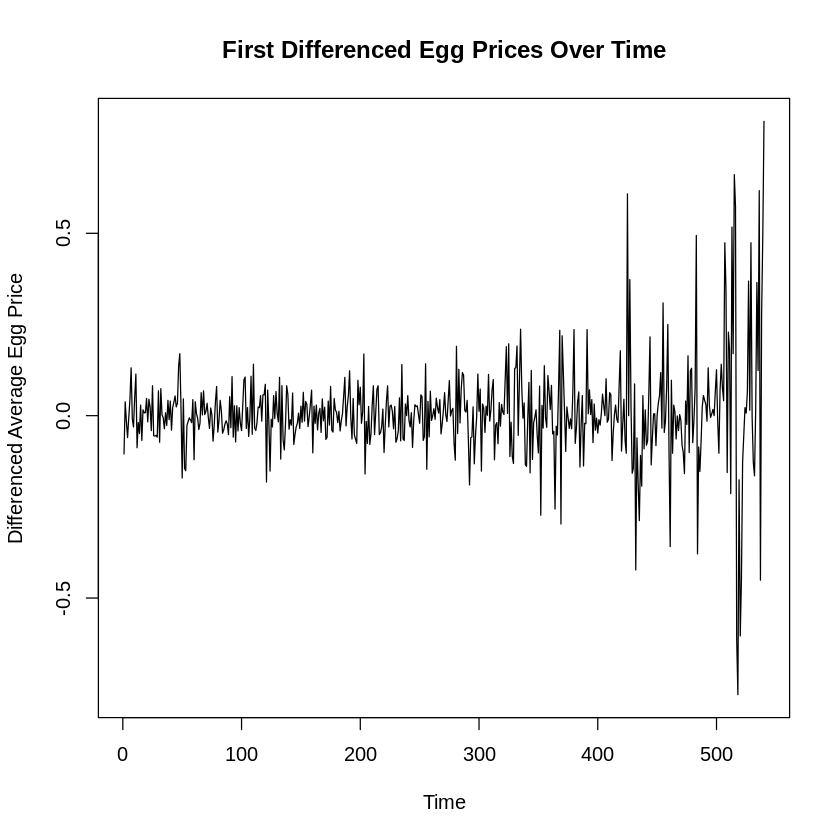

In [16]:
# nonstationary so apply first difference and create new plot
plot.ts(first_diff,
        main="First Differenced Egg Prices Over Time",
        ylab="Differenced Average Egg Price",
        xlab="Time")

ACF,0.13,0.12,0.04,0.02,-0.06,-0.06,-0.06,-0.08,-0.03,-0.10,0.03,0.06,0.01,-0.01,-0.06,-0.05,-0.07,-0.16,-0.02,-0.02
PACF,0.13,0.10,0.01,0.00,-0.07,-0.05,-0.03,-0.06,0.00,-0.09,0.06,0.07,-0.02,-0.04,-0.08,-0.04,-0.04,-0.15,0.03,0.01


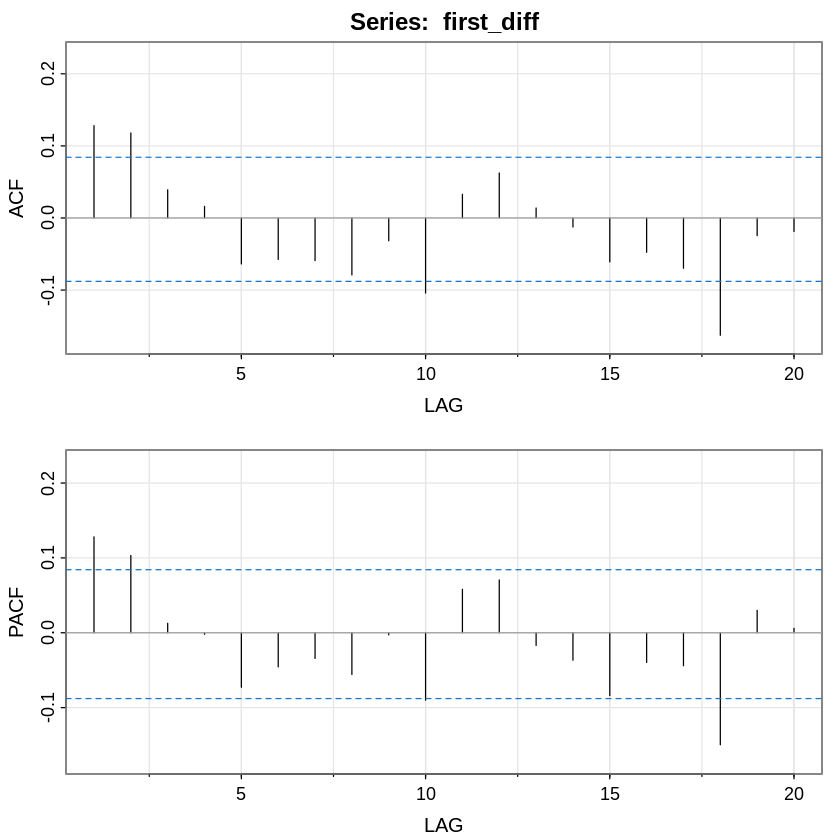

In [6]:
# create ACF and PACF plots
astsa::acf2(first_diff, max.lag= 20)

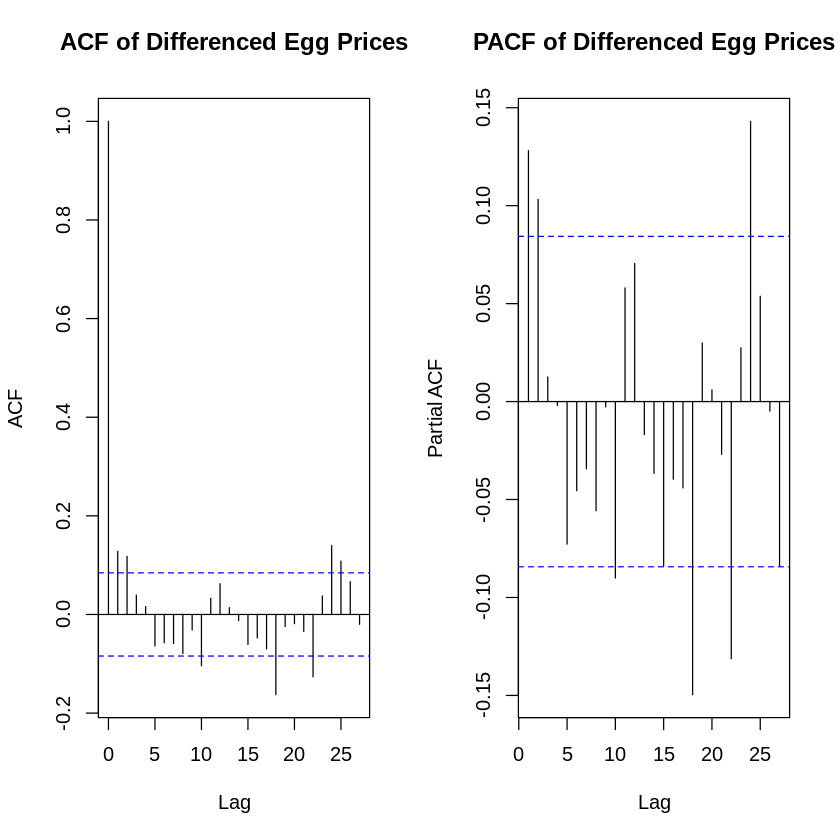

In [19]:
par(mfrow=c(1,2))  # Plot ACF and PACF side by side
acf(first_diff, main="ACF of Differenced Egg Prices")
pacf(first_diff, main="PACF of Differenced Egg Prices")
par(mfrow=c(1,1))  # Reset plot layout

In [21]:
model1 <- arima(first_diff, order=c(2,1,1))  # Try ARIMA(2,1,1)
model2 <- arima(first_diff, order=c(1,1,1))  # Try ARIMA(1,1,1)
model3 <- arima(first_diff, order=c(2,1,2))  # Try ARIMA(2,1,2)

# Compare model summaries
summary(model1)
summary(model2)
summary(model3)


Call:
arima(x = first_diff, order = c(2, 1, 1))

Coefficients:
         ar1     ar2      ma1
      0.1270  0.1187  -0.9956
s.e.  0.0443  0.0448   0.0084

sigma^2 estimated as 0.01726:  log likelihood = 327.09,  aic = -646.18

Training set error measures:
                     ME      RMSE        MAE MPE MAPE      MASE         ACF1
Training set 0.00554086 0.1312527 0.07938568 NaN  Inf 0.7208369 -0.004401503


Call:
arima(x = first_diff, order = c(1, 1, 1))

Coefficients:
         ar1      ma1
      0.1370  -0.9942
s.e.  0.0445   0.0083

sigma^2 estimated as 0.01749:  log likelihood = 323.6,  aic = -641.2

Training set error measures:
                      ME      RMSE       MAE MPE MAPE      MASE        ACF1
Training set 0.005758757 0.1321097 0.0796667 NaN  Inf 0.7233886 -0.01701745


Call:
arima(x = first_diff, order = c(2, 1, 2))

Coefficients:
         ar1     ar2      ma1     ma2
      0.2574  0.1014  -1.1277  0.1314
s.e.  0.2805  0.0618   0.2805  0.2787

sigma^2 estimated as 0.01725:  log likelihood = 327.18,  aic = -644.36

Training set error measures:
                     ME      RMSE        MAE MPE MAPE     MASE        ACF1
Training set 0.00551326 0.1312318 0.07943403 NaN  Inf 0.721276 -0.00236234

In [22]:
best_model <- auto.arima(first_diff)
summary(best_model)

Series: first_diff 
ARIMA(0,0,2) with zero mean 

Coefficients:
         ma1     ma2
      0.1191  0.1184
s.e.  0.0439  0.0426

sigma^2 = 0.01733:  log likelihood = 329.67
AIC=-653.35   AICc=-653.3   BIC=-640.47

Training set error measures:
                      ME      RMSE        MAE MPE MAPE      MASE        ACF1
Training set 0.006446499 0.1314034 0.07919699 NaN  Inf 0.7191236 0.004626112

[1] "RMSE: 0.394473305150489"
[1] "MAE: 0.322014874546117"


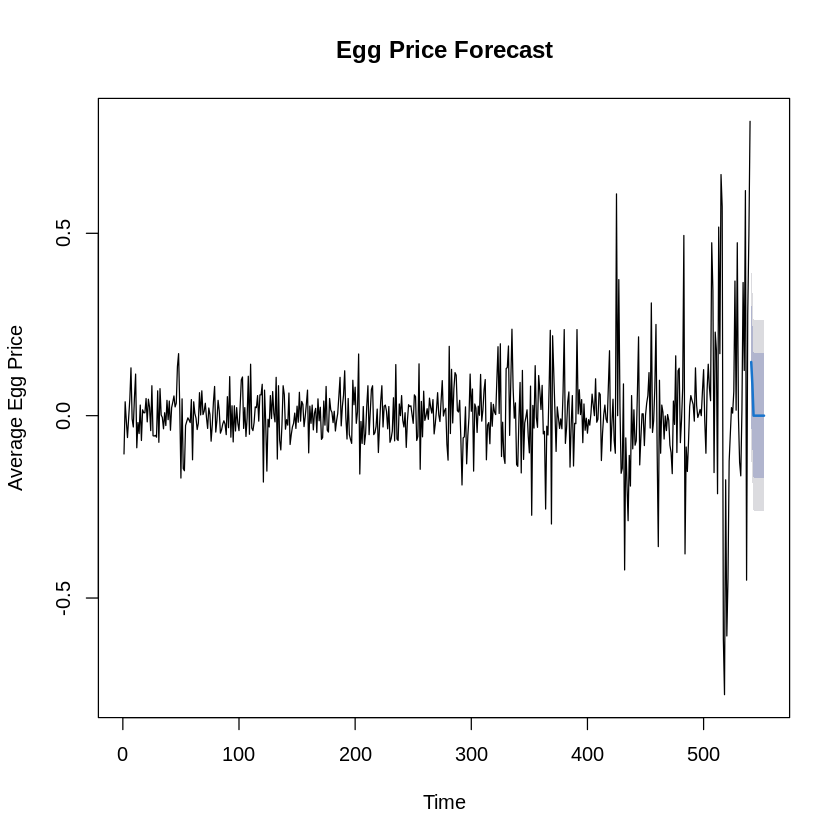

In [24]:
# Forecast the next 12 time periods (months)
forecast_values <- forecast(best_model, h=12)

# Plot the forecast
plot(forecast_values, main="Egg Price Forecast", ylab="Average Egg Price", xlab="Time")

# Calculate RMSE and MAE
actual_values <- tail(first_diff, 12)  # Last 12 actual values
predicted_values <- forecast_values$mean

rmse <- sqrt(mean((actual_values - predicted_values)^2))
mae <- mean(abs(actual_values - predicted_values))

print(paste("RMSE:", rmse))
print(paste("MAE:", mae))